In [405]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv
from sklearn.datasets import load_boston
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

### Generation of pseudo-data

In [603]:
n = 100
k = 10 
mu1 = np.random.randn(2)
mu2 = 2*np.random.randn(2)
cov1 = 0
v11 = 2
v12 = 2
cov2 = 0
v21 = 2
v22 = 2

sigma1 = [[v11, cov1],[cov1, v12]]
sigma2 = [[v21, cov1],[cov2, v22]]


x1, y1 = np.random.multivariate_normal(mu1, sigma1, n).T
x2, y2 = np.random.multivariate_normal(mu2, sigma2, n).T

## calculating sample variance for x1 and x2
def sample_cov(x, n, k):
    x = x.reshape(k, n)
    q_init = np.zeros(shape=(k, k))
    for i in range(2):
        for j in range(2):
            if i == j:
                q_init[i][j] = np.var(x[i])
            else:
                for k in range(100):
                    q_init[i][j] += (1/(n-1))*(x[i][k] - np.mean(x[i]))*(x[j][k] - np.mean(x[j]))

    return q_init

## returns the covariance of bivariate variables to build y
x = np.concatenate((x1, x2), axis=0)
sigma = sample_cov(x, 100, 2)

x_train, y_train = np.random.multivariate_normal(mu1, sigma, n).T
x_test, y_test = np.random.multivariate_normal(mu2, sigma, n).T

## define rounding function
def round_distribution_var(test):
    round_test = np.empty(len(test),)
    for i in range(len(test)):
        round_test[i] = round(test[i], 5)
    return round_test

## round x_train, y_train and x_test, y_test
x_train = round_distribution_var(x_train)
y_train = round_distribution_var(y_train)
x_test = round_distribution_var(x_test)
y_test = round_distribution_var(y_test)


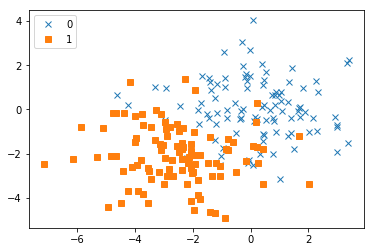

In [604]:
plt.plot(x_train, y_train, 'x', label='0')
plt.plot(x_test, y_test, 's', label='1')
#plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

### K-Nearest  Neighbours Implementation

In [580]:
## convert ndarray to list for k-nearest neighbour implementation

In [606]:
## function for converting 2-D nd-array to list of lists
def nd_to_lst(ndarray, k):
        nd_split_lst= []
        for i in range(k):
            temp_split_nd = []
            temp_split_nd = ndarray[i].tolist()
            nd_split_lst.append(temp_split_nd)
        return nd_split_lst

def probability_centroids(x_total):
    p_centroids = []
    for i in range(len(x_total)):
        p_centroids.append(1/len(x_total))
    return p_centroids

def get_value_index(mylst, value):
    coordsList = [[x, y] for x, li in enumerate(mylst) for y, val in enumerate(li) if val==value]
    return coordsList

def get_argmin(mylst):
    min_val, min_idx = min((val, idx) for (idx, val) in enumerate(mylst))
    return min_idx
    

def k_nearest_neighbours(x_train, x_test, y_train, y_test, k, iters):
   
        ## initialise input x and response y from a distribution of x1 + x2 
        ## of uncorrelated and homoscedastic random vectors x1 and x2
        ## x1 and x2 are x_train and x_test

        x_total = np.concatenate((x_train, x_test), 0)
        y_total = np.concatenate((y_train, y_test), 0)
        x = x_total
        y = y_total
        x_split = np.split(x_total, k)
        y_split = np.split(y_total, k)


        x_split_lst = nd_to_lst(x_split, k)
        y_splt_list = nd_to_lst(y_split, k)

        ## make initial assignment of S and M in ndarray from ndarray
        # S = np.empty((len(l)), ).reshape(k, int(len(l)/k))
        ## draw a probability distribution for random centroids 
        M = np.zeros((k,), dtype=float)     
        p_centr = probability_centroids(x_total)
        M = np.random.choice(x_total, k, p_centr)
        
        ## convert the S and M into lists
        ## create an empty list to store the distance for each xp in list of all elements x
        ## S = [S1, S2, S3, ..., Sk], where S[i] = [x[(n/k)+i:(i+1)*n/k]]
        ## get min index for xp in distance list d
        ## assign S[index_j] with value
        ## update M
        S_lst = [[] for i in range(k)]
        M = M.tolist()
        myList = [[0,1],[1,3.3266]]
        for l in range(iters):
            for index, value in enumerate(x.tolist()):
                d = []
                for i in range(k):
                    d.append(value - M[i])

        
                index_j = get_argmin(d)

         
                S_lst[index_j].append(value) 
        
         
                M[index_j] = sum(S_lst[index_j])/len(S_lst[index_j])
        return S_lst, M

In [ ]:
k_nearest_neighbours(x_train, x_test, y_train, y_test, 2, 10000)